   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.4 MB/s eta 0:00:00
--2024-10-16 10:44:34--  https://raw.githubusercontent.com/Abishek0411/Machinge-Learning-Lab/main/GOOG.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 450531 (440K) [text/plain]
Saving to: ‘GOOG.csv’

GOOG.csv            100%[===================>] 439.97K  --.-KB/s    in 0.1s    

2024-10-16 10:44:35 (3.07 MB/s) - ‘GOOG.csv’ saved [450531/450531]

Dataset Overview:
         Date       High        Low       Open      Close      Volume  \
0  2004-08-23  56.528118  54.321388  55.168217  54.495735  18342897.0   
1  2004-08-24  55.591629  51.591621  55.412300  52.239197  15319808.0   
2  2004-08-25  53.798351  51.746044  52.284027  52.802086   9232276.0   
3  2004-08-26  53.773445

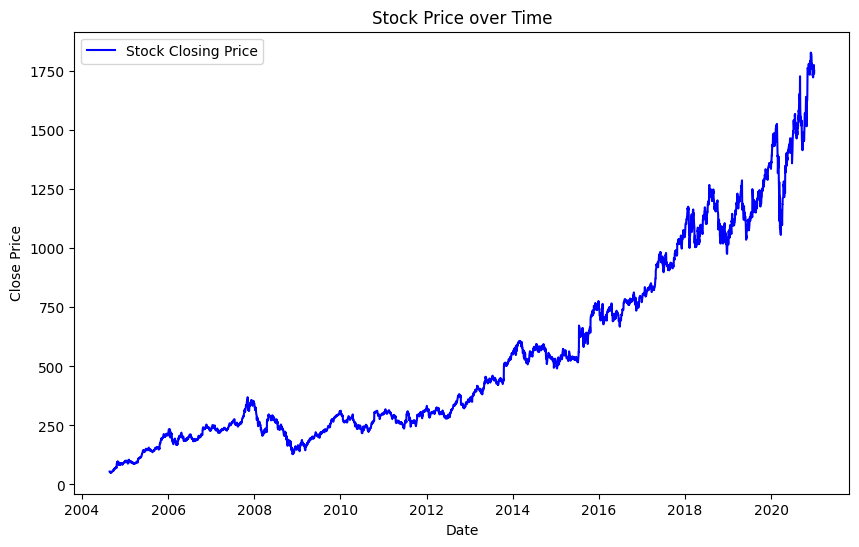

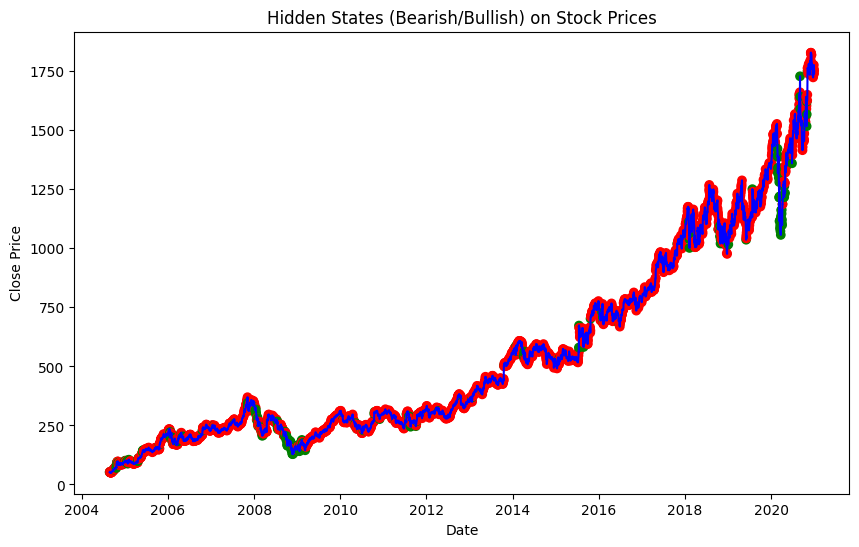


Transition Matrix (probability of switching between states):
[[0.92566948 0.07433052]
 [0.50012515 0.49987485]]

Means of the Gaussian distributions for each state (expected return):
[[0.00115971]
 [0.00012944]]

Covariances of the Gaussian distributions for each state:
[[[0.00015825]]

 [[0.00182204]]]


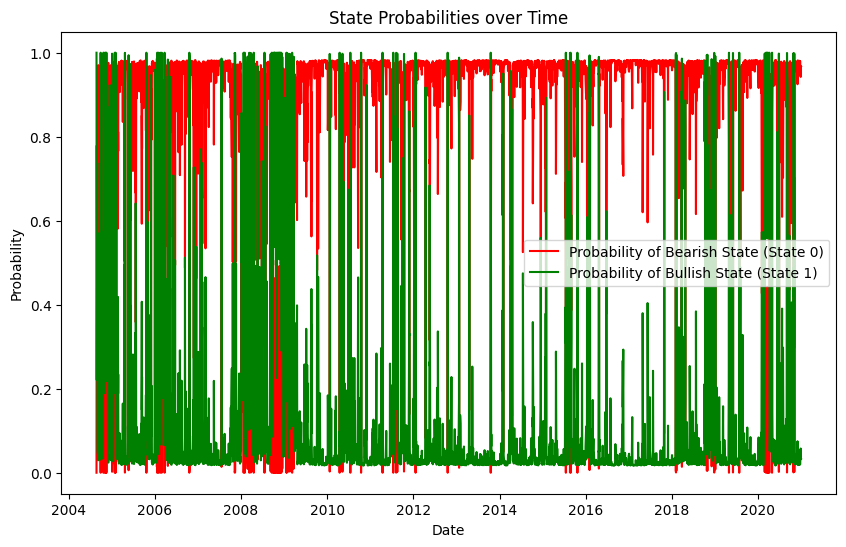

In [1]:
# Install necessary libraries
!pip install numpy pandas matplotlib seaborn hmmlearn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Download the Stock Prices dataset from GitHub (you can replace it with a Kaggle dataset)
!wget https://raw.githubusercontent.com/Abishek0411/Machinge-Learning-Lab/main/GOOG.csv

# Load the dataset into a pandas DataFrame
df = pd.read_csv('GOOG.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Data Preprocessing
# We'll focus on 'Date' and 'Close' price for HMM
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]

# Plot the closing prices to visualize trends
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Stock Closing Price')
plt.title('Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate daily returns as observations for HMM
df['Returns'] = df['Close'].pct_change().dropna()

# Drop missing values
df = df.dropna()

# Reshape returns into a 2D array as required by hmmlearn
returns = df['Returns'].values.reshape(-1, 1)

# 1. Fit a Hidden Markov Model (HMM) with Gaussian emissions
# Assume we have 2 hidden states (bullish, bearish)
model = hmm.GaussianHMM(n_components=2, covariance_type="full", random_state=42)

# Fit the model
model.fit(returns)

# Predict hidden states for each observation (day)
hidden_states = model.predict(returns)

# 2. Visualizing the hidden states
# Add hidden states to the dataframe
df['Hidden State'] = hidden_states

# Plot the hidden states over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Stock Closing Price', color='blue')
colors = ['red' if state == 0 else 'green' for state in hidden_states]
plt.scatter(df['Date'], df['Close'], color=colors, label='Hidden State (0 = Bearish, 1 = Bullish)')
plt.title('Hidden States (Bearish/Bullish) on Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# 3. Model parameters
print("\nTransition Matrix (probability of switching between states):")
print(model.transmat_)

print("\nMeans of the Gaussian distributions for each state (expected return):")
print(model.means_)

print("\nCovariances of the Gaussian distributions for each state:")
print(model.covars_)

# 4. Visualizing State Probabilities
# Compute the probabilities of each hidden state for each observation
state_probs = model.predict_proba(returns)

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], state_probs[:, 0], color='red', label='Probability of Bearish State (State 0)')
plt.plot(df['Date'], state_probs[:, 1], color='green', label='Probability of Bullish State (State 1)')
plt.title('State Probabilities over Time')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.legend()
plt.show()
